# Plotting LMDZ output with Python

Author: Lionel Guez

In this notebook, we demonstrate commands to visualize LMDZ output. We will use Python modules that may not be installed on your computer. We do not cover here the installation of these modules.

## Basic plotting using only the modules netCDF4 and matplotlib

In [1]:
import netCDF4
import matplotlib.pyplot as plt

Let us take one of the history files from `LMDZtrunk/modipsl/modeles/LMDZ/BENCH32x32x39`.

One-dimensional plot. For example, temperature as a function of time, at 
1st model level, 17th latitude, 17th longitude:

Text(0.5, 0, 'time (days since Jan. 1st 1980)')

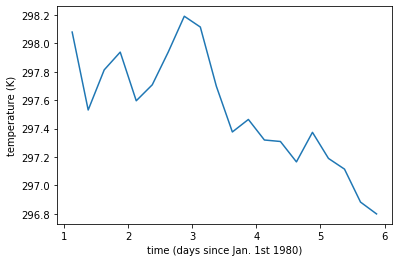

In [2]:
hist_file = netCDF4.Dataset("histhf.nc")
plt.plot(hist_file["time_counter"][:] / 86400, hist_file["temp"][:, 0, 16, 16])
plt.ylabel("temperature (K)")
plt.xlabel("time (days since Jan. 1st 1980)")

## `nc_time_axis`

If you want a better representation of the time coordinate, you can use the module `nc_time_axis`. But first you need to correct the calendar, which does not conform to CF conventions. This is necessary to use the module `nc_time_axis`:

In [3]:
if hist_file["time_counter"].calendar == "360d":
    hist_file.close() # close before re-opening in writing mode

    with netCDF4.Dataset("histhf.nc", "r+") as hist_file:
        hist_file["time_counter"].calendar = "360_day"
        
    hist_file = netCDF4.Dataset("histhf.nc") # re-open in read-ony mode

In [ ]:
import nc_time_axis

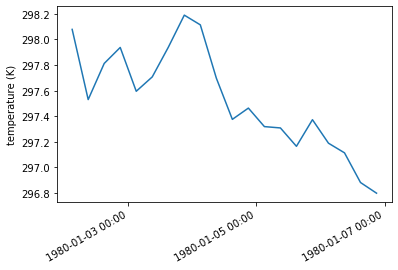

In [4]:
time_counter = netCDF4.num2date(hist_file["time_counter"][:], hist_file["time_counter"].units, 
                                hist_file["time_counter"].calendar)
t = [nc_time_axis.CalendarDateTime(item, "360_day") for item in time_counter]
plt.plot(t, hist_file["temp"][:, 0, 16, 16])
plt.ylabel("temperature (K)")
plt.gcf().autofmt_xdate()

## Contour plot with matplotlib only

Contour plot, for example, temperature as a function of latitude and longitude, at first time, first model level:

Text(0, 0.5, 'latitude (degrees north)')

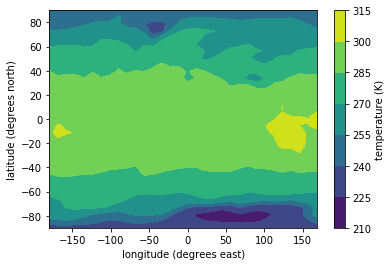

In [5]:
plt.contourf(hist_file["lon"][:], hist_file["lat"][:], hist_file["temp"][0, 0])
plt.colorbar(label = "temperature (K)")
plt.xlabel("longitude (degrees east)")
plt.ylabel("latitude (degrees north)")

## Cartopy

If you want to add coastlines, you can use the module cartopy:

In [ ]:
import numpy as np
import cartopy.crs as ccrs

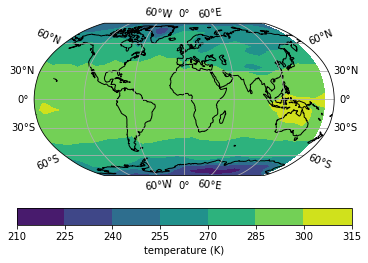

In [7]:
lon_2d, lat_2d = np.meshgrid(hist_file["lon"], hist_file["lat"])
ax = plt.axes(projection=ccrs.Robinson())
plt.contourf(lon_2d, lat_2d, hist_file["temp"][0, 0], 
             transform = ccrs.PlateCarree())
ax.coastlines()
ax.set_global()
ax.gridlines(draw_labels = True)
plt.colorbar(label = "temperature (K)", orientation='horizontal')

## xarray

Instead of opening a NetCDF file with the module netCDF4, you can open it with xarray. xarray is actually built on top of netCDF4, it offers a higher-level interface to the data. For example, you can select a slice of the data by referring to the name of a dimension, instead of referring to the position of this dimension in the list of dimensions. Here is an example. But first, close the file opened with netCDF4:

In [ ]:
hist_file.close()

In [8]:
import xarray as xr

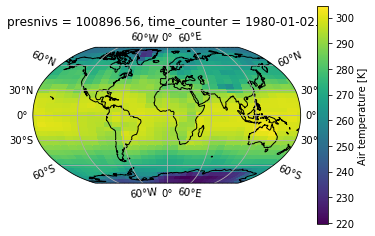

In [10]:
hist_file = xr.open_dataset("histhf.nc")
p = hist_file.temp.isel(time_counter = 0, presnivs = 0).plot(subplot_kws={"projection": ccrs.Robinson()},
                                                             transform=ccrs.PlateCarree())
p.axes.coastlines()
p.axes.gridlines(draw_labels = True)